# **Segmentation of street scapes with computer vision**





---

## **Introduction**

Welcome to the **MIT Senseable City Lab Amsterdam street scapes workshop**! This notebook guides you through a quick setup for using computer vision to segment street scapes.

### Workflow:
The analysis in this notebook will consist of 5 steps:
1. **Load the pretrained model from a model library**
2. **Prepare Dataset**: Add your images to the input folder
3. **Run the Model**: Execute the model on your images
4. **Visualize the results**: Visually inspect the model results
5. **Export street features from the images**: extract the detected features into a csv with the % of each class.

---

Let’s begin!


## **Getting Started with Google Colab**

Google Colab provides an easy-to-use environment for running Python notebooks. To get started effectively, follow the steps below:

**1. Connect to a GPU**

Using a GPU can significantly accelerate computations, especially for machine learning and deep learning tasks. To connect to a GPU in Colab:

1. Go to the top menu bar and select **Runtime > Change runtime type**.
2. In the **Runtime type** dropdown menu, select `Python 3`.
3. In the **Hardware accelerator** dropdown menu, select `GPU` (preferably T4 if available).
4. Click **Save** to apply the changes.

Once the runtime restarts, you'll be connected to a GPU.

**2. Display Files in the `/content` Directory**

Colab mounts a temporary storage space at `/content`. You can use this directory to store and access files during your session. To view the files in the `/content` directory, you can use the file browser panel. Here's how:

1. Look to the **left sidebar** of the Colab interface.
2. Click the **folder icon** (📁) to open the **Files** pane. This pane allows you to explore the directory structure visually.
3. Once the Files pane opens, you will see the contents of the `/content` directory displayed.
4. If the directory looks empty, click the **Refresh** button (a circular arrow icon) at the top of the Files pane to reload the file list.


## **Import Required Packages**

Before starting, ensure that all necessary libraries are imported, and the environment is set up correctly. Run the following cell to import the required packages and configure the environment.


In [ ]:
from transformers import DPTImageProcessor, DPTForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import os
import torch
import numpy as np
import pandas as pd
import cv2

## **Downloading pretrained model**


In this section, we download the model weights and architecture required for processing the images. DPT model documentation can be found here: https://github.com/isl-org/DPT

**Note:** You don't need to edit or interact with this section. Simply run the cells to ensure the files are downloaded and ready for use.



In [ ]:
feature_extractor = DPTImageProcessor.from_pretrained("Intel/dpt-large-ade")
model = DPTForSemanticSegmentation.from_pretrained("Intel/dpt-large-ade")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

Some weights of DPTForSemanticSegmentation were not initialized from the model checkpoint at Intel/dpt-large-ade and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.batch_norm1.bias', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm1.num_batches_tracked', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm1.running_mean', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm1.running_var', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm1.weight', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm2.bias', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm2.num_batches_tracked', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm2.running_mean', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm2.running_var', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this mo

## **Prepare the images**

This section we fetch our test images and create a folder for the images that you want to process.

**What to do:**  
Simply run this cell to set up the folder. It will fetch the images from git and create a folder with the images

### Create folder
**Note**: Simply run this cell.

In [ ]:
# fetch images from git
!git clone https://github.com/Mitch182/workshop-TUdelft.git

Cloning into 'workshop-TUdelft'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 19 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 2.69 MiB | 12.85 MiB/s, done.
Resolving deltas: 100% (1/1), done.


### Display image as a check

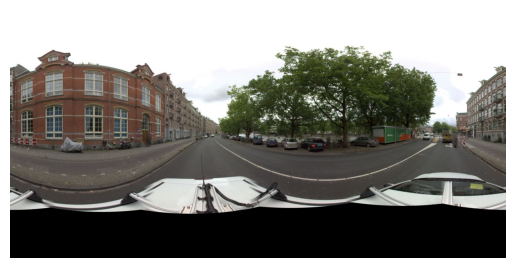

In [ ]:
# open image
image = Image.open('/content/workshop-TUdelft/images/TMX7316010203-000044_pano_0000_002778.jpeg')

# display the image
plt.imshow(image)
plt.axis('off')
plt.show()



Remember - we perceive images as images, but computers see them as numpy arrays. See the example below. If you want to try it out, try to filter on red bricks, or grey pavements.

(1000, 2000, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


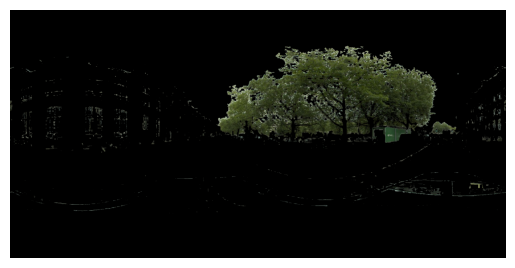

In [ ]:
# Convert to NumPy array
image_array = np.array(image)

# Display shape of the array
print(image_array.shape)
print(image_array)

hsv = cv2.cvtColor(image_array, cv2.COLOR_BGR2HSV)

# mask of green somewhere in the range (36,25,25) ~ (86, 255,255)
mask = cv2.inRange(hsv, (36, 25, 25), (86, 255,255))

green = cv2.bitwise_and(image_array,image_array, mask= mask)

# display the image
plt.imshow(green)
plt.axis('off')
plt.show()

Now we are going to apply a convolution to the numpy array - just as an example, we are going to apply a sharpening kernel (play with the center value of 9 to see the results). Or ask Chat.gpt to define a different kernel (blurring, edge, etc.)


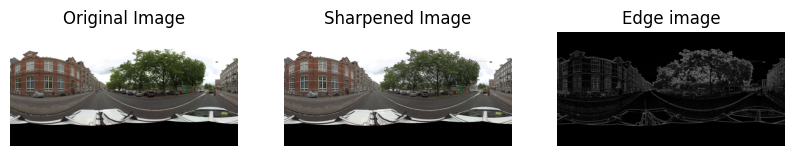

In [ ]:
# Define sharpening kernel
sharpening_kernel = np.array([[ -1, -1, -1],
                              [ -1,  9, -1],
                              [ -1, -1, -1]])

edge_kernel =       np.array([[1,  1,  1],
                             [1, -8,  1],
                             [1,  1,  1]])

# Apply the filter using OpenCV
sharpened_image = cv2.filter2D(image_array, -1, sharpening_kernel)

edge_image = cv2.filter2D(image_array, -1, edge_kernel)

# Show the original and sharpened images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_array)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(sharpened_image)
plt.title("Sharpened Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(edge_image)
plt.title("Edge image")
plt.axis("off")

plt.show()

## **Test model on single image**

**Note:** Simply run this cell. This uses the DPT segmentation model to classify each pixel in the image into the classes of the MIT ADE20k dataset (https://ade20k.csail.mit.edu/).


torch.Size([1, 150, 480, 480])


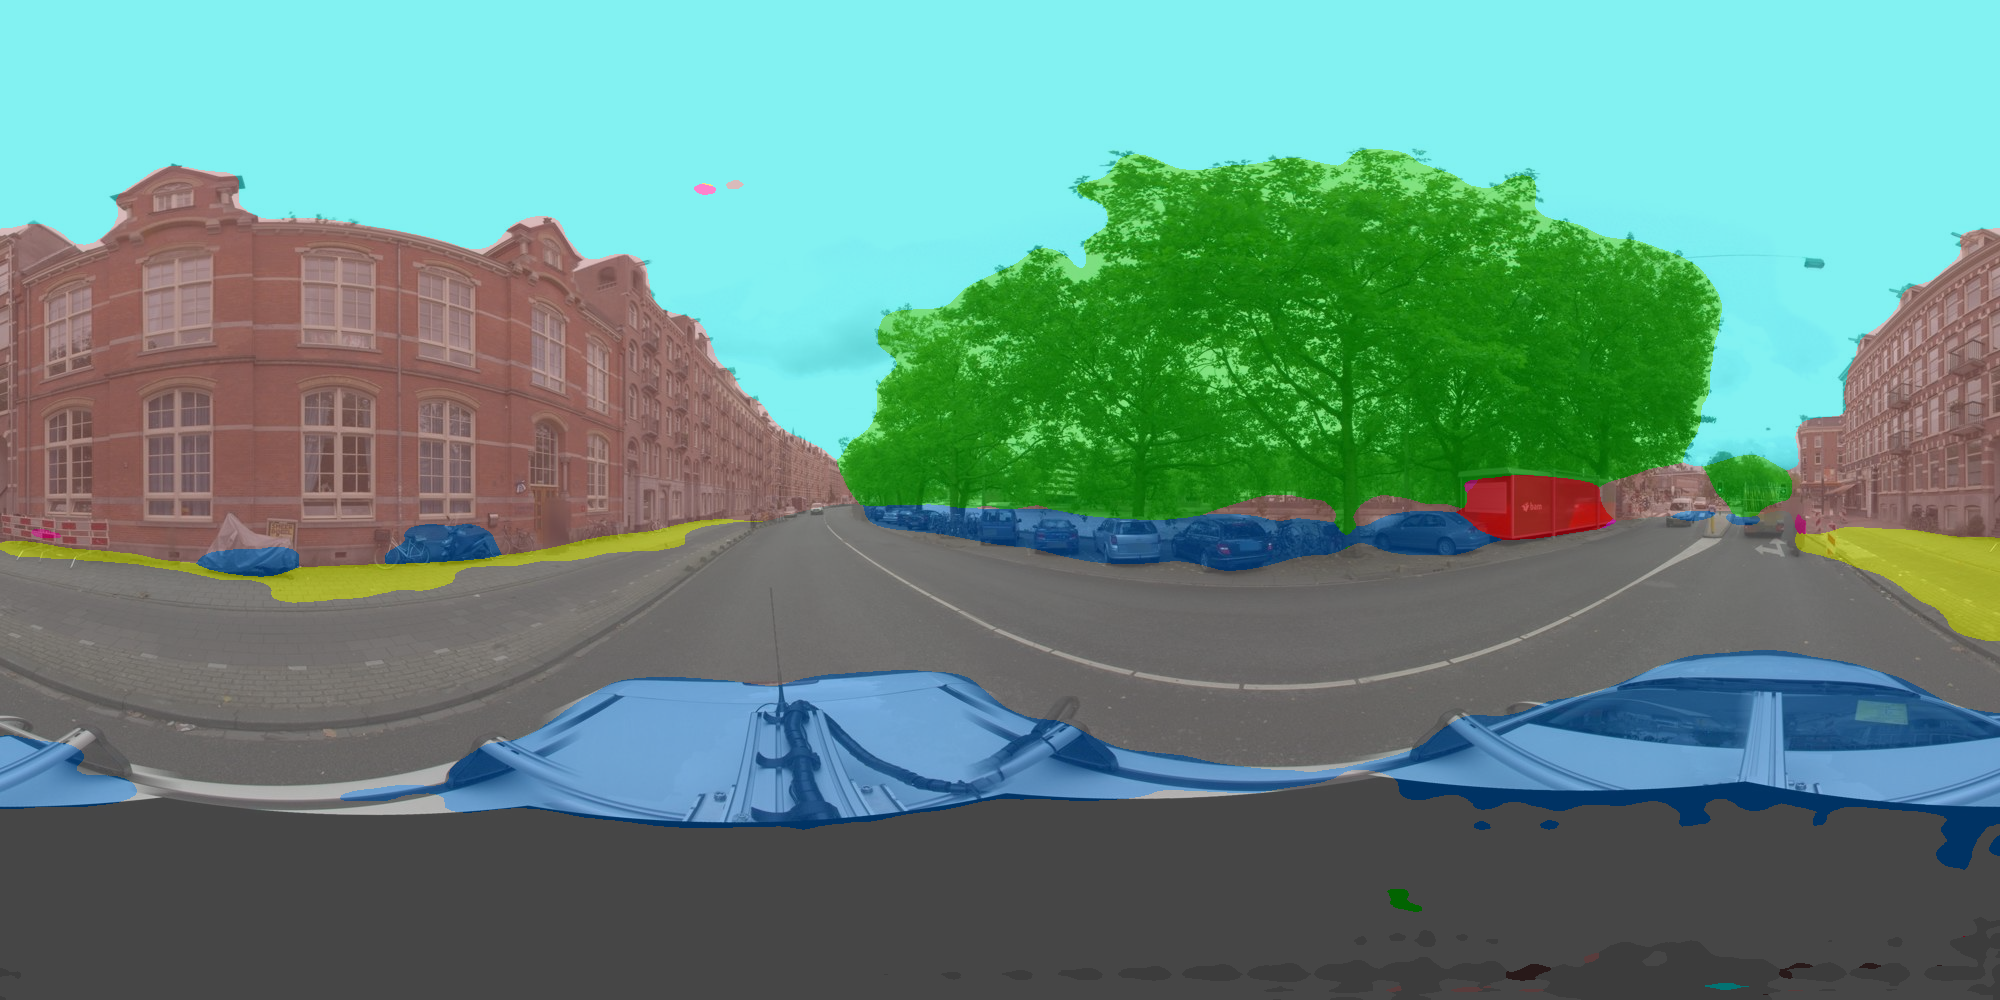

In [ ]:
inputs = feature_extractor(images=image, return_tensors="pt")

outputs = model(**inputs)
logits = outputs.logits
print(logits.shape)
logits
prediction = torch.nn.functional.interpolate(
    logits,
    size=image.size[::-1],  # reverse the size of the original image (width, height)
    mode="bicubic",
    align_corners=False
)


def process_and_display_segmentation(prediction, og_image):
    # process the prediction
    prediction = torch.argmax(prediction, dim=1) + 1
    prediction = prediction.squeeze()
    prediction = prediction.cpu().numpy()
    predicted_seg = Image.fromarray(prediction.astype('uint8'))

    # ADE20K color palette
    adepallete = [0,0,0,120,120,120,180,120,120,6,230,230,80,50,50,4,200,3,120,120,80,140,140,140,204,5,255,230,230,230,4,250,7,224,5,255,235,255,7,150,5,61,120,120,70,8,255,51,255,6,82,143,255,140,204,255,4,255,51,7,204,70,3,0,102,200,61,230,250,255,6,51,11,102,255,255,7,71,255,9,224,9,7,230,220,220,220,255,9,92,112,9,255,8,255,214,7,255,224,255,184,6,10,255,71,255,41,10,7,255,255,224,255,8,102,8,255,255,61,6,255,194,7,255,122,8,0,255,20,255,8,41,255,5,153,6,51,255,235,12,255,160,150,20,0,163,255,140,140,140,250,10,15,20,255,0,31,255,0,255,31,0,255,224,0,153,255,0,0,0,255,255,71,0,0,235,255,0,173,255,31,0,255,11,200,200,255,82,0,0,255,245,0,61,255,0,255,112,0,255,133,255,0,0,255,163,0,255,102,0,194,255,0,0,143,255,51,255,0,0,82,255,0,255,41,0,255,173,10,0,255,173,255,0,0,255,153,255,92,0,255,0,255,255,0,245,255,0,102,255,173,0,255,0,20,255,184,184,0,31,255,0,255,61,0,71,255,255,0,204,0,255,194,0,255,82,0,10,255,0,112,255,51,0,255,0,194,255,0,122,255,0,255,163,255,153,0,0,255,10,255,112,0,143,255,0,82,0,255,163,255,0,255,235,0,8,184,170,133,0,255,0,255,92,184,0,255,255,0,31,0,184,255,0,214,255,255,0,112,92,255,0,0,224,255,112,224,255,70,184,160,163,0,255,153,0,255,71,255,0,255,0,163,255,204,0,255,0,143,0,255,235,133,255,0,255,0,235,245,0,255,255,0,122,255,245,0,10,190,212,214,255,0,0,204,255,20,0,255,255,255,0,0,153,255,0,41,255,0,255,204,41,0,255,41,255,0,173,0,255,0,245,255,71,0,255,122,0,255,0,255,184,0,92,255,184,255,0,0,133,255,255,214,0,25,194,194,102,255,0,92,0,255]

    predicted_seg.putpalette(adepallete)

    # ensure the original image is RGB
    og_image = og_image.convert("RGB")

    # resize the segmentation to match the original image for overlay
    if predicted_seg.size != og_image.size:
        predicted_seg = predicted_seg.resize(og_image.size, Image.NEAREST)

    # overlay mask on original image
    out = Image.blend(og_image, predicted_seg.convert("RGB"), alpha=0.5)

    return out

process_and_display_segmentation(prediction, image)


## **Running model on directory**

This section runs inference on the entire image library that you imported earlier and saves the output masks in a new folder

**Note:** Simply run this cell and the masks will pop up in a new folder called 'masks'

In [ ]:
input_directory = "/content/workshop-TUdelft/images"
output_directory = "/content/workshop-TUdelft/masks"

# define color pallete for masks
adepallete = [0,0,0,120,120,120,180,120,120,6,230,230,80,50,50,4,200,3,120,120,80,140,
              140,140,204,5,255,230,230,230,4,250,7,224,5,255,235,255,7,150,5,61,120,120,70,8,255,51,255,6,82,
              143,255,140,204,255,4,255,51,7,204,70,3,0,102,200,61,230,250,255,6,51,11,102,255,255,7,71,255,9,224,9,7,230,
              220,220,220,255,9,92,112,9,255,8,255,214,7,255,224,255,184,6,10,255,71,255,41,10,7,255,255,224,255,8,102,8,255,255,61,
              6,255,194,7,255,122,8,0,255,20,255,8,41,255,5,153,6,51,255,235,12,255,160,150,20,0,163,255,140,140,140,250,10,15,20,255,
              0,31,255,0,255,31,0,255,224,0,153,255,0,0,0,255,255,71,0,0,235,255,0,173,255,31,0,255,11,200,200,255,82,0,0,255,245,0,61,
              255,0,255,112,0,255,133,255,0,0,255,163,0,255,102,0,194,255,0,0,143,255,51,255,0,0,82,255,0,255,41,0,255,173,10,0,255,173,
              255,0,0,255,153,255,92,0,255,0,255,255,0,245,255,0,102,255,173,0,255,0,20,255,184,184,0,31,255,0,255,61,0,71,255,255,0,204,
              0,255,194,0,255,82,0,10,255,0,112,255,51,0,255,0,194,255,0,122,255,0,255,163,255,153,0,0,255,10,255,112,0,143,255,0,82,0,255,
              163,255,0,255,235,0,8,184,170,133,0,255,0,255,92,184,0,255,255,0,31,0,184,255,0,214,255,255,0,112,92,255,0,0,224,255,112,224,
              255,70,184,160,163,0,255,153,0,255,71,255,0,255,0,163,255,204,0,255,0,143,0,255,235,133,255,0,255,0,235,245,0,255,255,0,122,
              255,245,0,10,190,212,214,255,0,0,204,255,20,0,255,255,255,0,0,153,255,0,41,255,0,255,204,41,0,255,41,255,0,173,0,255,0,245,
              255,71,0,255,122,0,255,0,255,184,0,92,255,184,255,0,0,133,255,255,214,0,25,194,194,102,255,0,92,0,255]

# create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# process all images in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith((".jpeg")):  # make sure only images are processed
        image_path = os.path.join(input_directory, filename)
        image = Image.open(image_path)

        inputs = feature_extractor(images=image, return_tensors="pt")

        # run model inference
        outputs = model(**inputs)
        logits = outputs.logits
        print(f"Processing {filename}")

        # match og image size
        prediction = torch.nn.functional.interpolate(
            logits,
            size=image.size[::-1],  # Reverse the size of the original image (width, height)
            mode="bicubic",
            align_corners=False
        )

        #create mask
        prediction = torch.argmax(prediction, dim=1) + 1
        prediction = prediction.squeeze()
        prediction = prediction.cpu().numpy()
        predicted_seg = Image.fromarray(prediction.astype('uint8'))

        #ADE20K collar pallete
        predicted_seg.putpalette(adepallete)

         # resize the segmentation to match the original image for cosistency
        if predicted_seg.size != image.size:
          predicted_seg = predicted_seg.resize(image.size, Image.NEAREST)

        # save the colored mask with mask added to name
        output_filename = os.path.splitext(filename)[0] + "_mask.png"
        output_path = os.path.join(output_directory, output_filename)
        predicted_seg.save(output_path)

print("Finished processing")

Processing TMX7316010203-000044_pano_0000_002778.jpeg
Processing TMX7316010203-000044_pano_0000_002793.jpeg
Processing TMX7316010203-000076_pano_0000_003271.jpeg
Processing TMX7316010203-000044_pano_0000_003025.jpeg
Processing TMX7316010203-000076_pano_0000_003267.jpeg
Processing TMX7316010203-000044_pano_0000_003022.jpeg
Processing TMX7316010203-000044_pano_0000_002780.jpeg
Processing TMX7316010203-000044_pano_0000_002779.jpeg
Processing TMX7316010203-000044_pano_0000_002781.jpeg
Finished processing


Test open a mask to check if the process was succesfull

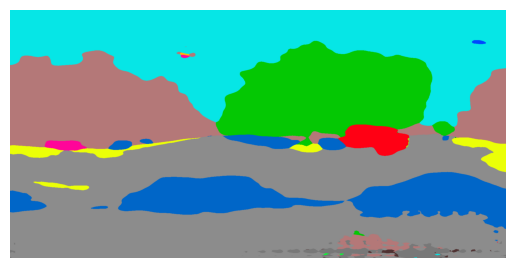

In [ ]:
# open image
image = Image.open('/content/workshop-TUdelft/masks/TMX7316010203-000044_pano_0000_002779_mask.png')

# display the image
plt.imshow(image)
plt.axis('off')
plt.show()


## **Extract class percentages**

This section we extract the percentage of each class into a csv. This csv can then be used to analyze street geometry. We have selected relevant classes for streets. If you ever want to play around with it in the future, for indoor environments for example, the documentation can be found here (https://docs.google.com/spreadsheets/d/1se8YEtb2detS7OuPE86fXGyD269pMycAWe2mtKUj2W8/edit?gid=0#gid=0).

**Note:** Simply run these cells to create the CSV


In [ ]:
# ADE20K relevant class names for streetscapes
ade20k_color_map = {
    'road': (140, 140, 140),
    'sidewalk': (235, 255, 7),
    'building': (180, 120, 120),
    'wall': (120, 120, 120),
    'sky': (6, 230, 230),
    'tree': (4, 200, 3),
    'person': (150, 5, 61),
    'car': (0, 102, 200),
    'signboard': (255, 5, 153),
    'streetlight': (0, 71, 255),
    'traffic light': (41, 0, 255),
    'pole': (51, 0, 255),
    'fence': (255, 184, 6),
    'grass': (4, 250, 7),
    'bridge': (255, 82, 0),
    'bus': (255, 0, 245),
    'truck': (255, 0, 20),
    'bicycle': (255, 245, 0),
    'motorcycle': (163, 0, 255),
    'bench': (194, 255, 0)
}

mask_directory = '/content/workshop-TUdelft/masks'
output_csv = 'class_percentages.csv'


def calculate_class_percentages(mask):
    height, width = mask.shape[:2]
    total_pixels = height * width

    # create a dictionary to store percentages
    class_percentages = {class_name: 0 for class_name in ade20k_color_map.keys()}

    # count pixels for each class
    for class_name, color in ade20k_color_map.items():
        class_pixels = np.sum(np.all(mask == color, axis=-1))
        class_percentages[class_name] = (class_pixels / total_pixels)

    return class_percentages

def process_masks_to_csv(mask_directory, output_csv):
    all_percentages = []

    #iterate over mask in mask directory
    for filename in os.listdir(mask_directory):
        if filename.endswith('.png'):
            mask_path = os.path.join(mask_directory, filename)
            mask = np.array(Image.open(mask_path).convert('RGB'))

            # use calculate function for each mask
            percentages = calculate_class_percentages(mask)
            percentages['filename'] = filename
            all_percentages.append(percentages)

    # create dataframe
    df = pd.DataFrame(all_percentages)
    df = df.set_index('filename')
    df.to_csv(output_csv)
    print(f"CSV file saved to {output_csv}")

process_masks_to_csv(mask_directory, output_csv)



CSV file saved to class_percentages.csv


Now you have a csv, similar to the ones you can process with clustering algorithms, to identify visually similar areas - or use SVM to predict e.g. thermal comfort based on the visual features (if you have ground truth data for thermal comfort).

In [ ]:
#load dataframe
df = pd.read_csv('class_percentages.csv')
df

,filename,road,sidewalk,building,wall,sky,tree,person,car,signboard,...,traffic light,pole,fence,grass,bridge,bus,truck,bicycle,motorcycle,bench
0,TMX7316010203-000044_pano_0000_002779_mask.png,0.332600,0.016984,0.148504,0.008764,0.252463,0.124704,0.000000,0.099832,0.002808,...,0.000000,0.000000,0.000128,0.0,0.0,0.000000,0.011978,0.000000,0.000000,0.0
1,TMX7316010203-000044_pano_0000_002781_mask.png,0.284986,0.070922,0.149835,0.009340,0.240835,0.131305,0.000000,0.094896,0.001723,...,0.000000,0.000151,0.000157,0.0,0.0,0.000000,0.003721,0.000000,0.000000,0.0
2,TMX7316010203-000076_pano_0000_003271_mask.png,0.109445,0.044860,0.111911,0.138930,0.407371,0.005205,0.011144,0.063660,0.000023,...,0.000000,0.000000,0.006568,0.0,0.0,0.020790,0.000031,0.000000,0.000000,0.0
3,TMX7316010203-000044_pano_0000_002780_mask.png,0.333407,0.036023,0.145008,0.008869,0.247123,0.127063,0.000000,0.085377,0.000520,...,0.000000,0.000000,0.001370,0.0,0.0,0.000000,0.014331,0.000000,0.000000,0.0
4,TMX7316010203-000044_pano_0000_002793_mask.png,0.267583,0.044097,0.150905,0.011680,0.334993,0.046222,0.001827,0.082300,0.001014,...,0.000526,0.000000,0.000012,0.0,0.0,0.008481,0.001754,0.035006,0.000005,0.0
5,TMX7316010203-000044_pano_0000_003022_mask.png,0.290013,0.043629,0.268767,0.017173,0.267049,0.004305,0.000000,0.103422,0.001033,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
6,TMX7316010203-000044_pano_0000_002778_mask.png,0.347910,0.012152,0.145490,0.011356,0.257105,0.122274,0.000000,0.099142,0.000318,...,0.000000,0.000000,0.000007,0.0,0.0,0.000022,0.003847,0.000000,0.000000,0.0
7,TMX7316010203-000076_pano_0000_003267_mask.png,0.180730,0.154890,0.094985,0.029460,0.419283,0.008019,0.001897,0.100473,0.001978,...,0.000000,0.000000,0.000288,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
8,TMX7316010203-000044_pano_0000_003025_mask.png,0.308791,0.034915,0.250559,0.013080,0.275298,0.012700,0.000077,0.101667,0.001091,...,0.000000,0.000005,0.000210,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
